**Хэш функции**

Всё, что нам достаточно знать о криптографических хэш-функциях - это то, что они необратимы и вероятность получить одинаковый хэш при разных входных данных очень мала. Т.е. загрузив на входе некие данные, на выходе мы получим хэш этих данных по которому мы не можем однозначно восстановить данные которые были на входе. 

In [14]:
import hashlib

def sha256(any_string):
    to_bytes = bytes(any_string, 'utf-8')
    print(hashlib.sha256(to_bytes).hexdigest().upper())

sha256('Hello guys!')
sha256('I can put here anything!')
sha256('Самое главное, что чего бы я не ввёл на входе, на выходе я получу строку длиной строго 64 символа')
sha256('Ввиду конфигурации конкретно алгоритма sha-256 символы будут получатся в диапазоне 0-9 A-F')
sha256('Что очень удобно т.к. такую строку можно интерпретировать как число в шестнадцатеричной системе счисления (hex)')


E2C9BC2D982599745AE75305C16B1833D1E3DA9EC5F383B8521DB73AEDFC8BB3
36B775E1057E035E83140BFDEBD1D2A0D3E0FB0A0BB233C9131D8C5B736CF2D3
BBEA70C9600539F1F4A51BBF7C36EAF53EE510161EAF1F139DF353F882BDE72B
1F6D8E4079AB2BF04787D8D9119827E5C9FAFCC0A14DB9BCB15861C54805DE51
FB009EC0F8830A9E6B3BEDC573E6B22CC3697716831080FFA60A3D7F5467AA00


Криптографические хэш-функции устроены таким образом, что например по хэшу E2C9BC2D982599745AE75305C16B1833D1E3DA9EC5F383B8521DB73AEDFC8BB3 мы никак не можем понять, что на входе была строка 'Hello guys!'
Но прогнав через хэш функцию 'Hello guys' ещё раз, мы однозначно получим тот же самый хэш

In [15]:
sha256('Hello guys!')

E2C9BC2D982599745AE75305C16B1833D1E3DA9EC5F383B8521DB73AEDFC8BB3


Применение хэш функций многообразно, но одинм из самых простых примеров будет схема авторизации клиент-сервер по хэш функции. Предположим мы создали аккаунт с следующими данными login: silver166, password: mysuperpassword . Если сервер будет хранить ваши данные логина и пароля таким образом, то однажды, когда он будет взломан данные всех пользователей попадут в руки злоумышленников. Поэтому давайте просто посчитаем хэш вашей пары логин и пароль и будем хранить на сервере только данные в виде хэша.

In [17]:
sha256('silver166mysuperpassword')
sha256('silver166mysuperpassword1')

2989571D5A5A66ACBD9A5D9B8A73229660FE6664E69FA47EE2E716389EFCC1D7
34C8479C348B6461194E261E86863B601456A22F20EF5CC50CC9B2B60A83848D


Таким образом, каждый раз вводя на сервере логин и пароль, сервер будет расчитывать хэш введённой комбинации и сравнивать его с сохранённым в базе данных. Заметьте, что при ошибке в пароле даже на один символ, хэш получается совершенно другой.

**Blockhain. Что за зверь**
По сути технология blockchain это технология распределённых баз данных, которые защищены от внесения изменений задним числом. Несмотря на то, что криптовалюты тесно связаны с технологией блокчейна, в настоящее время блокчейн применяется и без связки с криптовалютами. Так в 2018 году через блокчейн была реализована закупка по фарм контракткам в Нижегородской области, в результате чего было сэкономленно порядка 50 млн. рублей. В Грузии реализовали на государственном уровне учёт кадастровых изменений с помощью блокчейн.



**Расчёт сложности, скорость сети**

Так как в результате хэширования мы получаем строчку из 64 символов, каждый из которых может принимать 16 значений, то элементарным исходом будем считать одну из строчек. В комбинаторике это соответсвует выбору с учётом порядка и с возвращением. Таким образом мы имеем $16 ^ {64} = (2^4) ^ {64} = 2^{256} $ возможных вариантов. Это же число соответсвует максимально возможному числу, которое может выпасть, оно будет соответсвовать хэшу FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF. 


Теперь вернёмся к хэшам, которые мы получали ранее, как уже было сказано т.к. они состоят из 0-9 и A-F, то их можно перевести в десятичную систему счисления. Переведём в десятичную систему хэш полученный из строки 'Hello guys!'

In [19]:
# sha256('Hello guys!') -> E2C9BC2D982599745AE75305C16B1833D1E3DA9EC5F383B8521DB73AEDFC8BB3
print(int(0xE2C9BC2D982599745AE75305C16B1833D1E3DA9EC5F383B8521DB73AEDFC8BB3))
print(int(0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF))
      

102579138797372391513057768004706660395014723771608852684090041015922677550003
115792089237316195423570985008687907853269984665640564039457584007913129639935


Первое число, которое мы получили,это выражение хэша в десятичной системе счисления, второе число - это максимальное число, которое можно получить хэшированием sha256. Таким образом, если ваш компьютер считает со скоростью 1 хэш в секунду, то вероятность получить конкректный хэш будет равняться 1/115792089237316195423570985008687907853269984665640564039457584007913129639935
В общем-то достаточно маленькое число.
Чтобы как-то сделать нахождение блока более вероятным, было решено выбрать некое число, любое число меньше которого будет засчитаваться, как допустимое, для поиска конкретного блока. Таким числом было решено выбрать число 0x00000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

In [22]:
print(int(0x00000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF))


26959946667150639794667015087019630673637144422540572481103610249215


Это число удобно записывать в виде степеней двойки. $0x00000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF = 16^{56} = 2^{4*56} = 2^{224}$ Это число назвали target_1, т.е. target при сложности 1. 
Таким образом, вероятность выкинуть число меньшее target_1 из общего числа вариантов равна $$P(\{(строка\ -> sha256\ -> hash) < target_1\})=\frac {2^{224}}{2^{256}}=\frac1{2^{32}}$$
Таким образом, если ваш компьютер вычисляет даже $1000000\ хэшей\ в\ секунду = 1 Mh s$ то, чтобы гарантированно найти блок вам потребуется $$\frac{2^{32}}{1000000} = 4295 \ секунд$$ 

Далее, т.к. количество хэшей, которое есть в сети - это величина не постоянная, то придумали механизм сложности, который должен увеличиваться по мере увеличения общей скорости сети. Идея в том, чтобы уменьшать число target_1 делая нахождение блока всё менее и менее вероятным.

Сложность есть ничто иное, как число показывающее во сколько раз текущий target меньше target_1.
$$Сложность = \frac{target_1}{target_{тек}}=\frac{2^{224}}{target_{тек}}$$
Таким образом при текущей сложности равной $6\ 068\ 891\ 541\ 676$, число меньше которого нужно выкинуть хэш равно 


In [24]:
int(26959946667150639794667015087019630673637144422540572481103610249215/6068891541676)

4442318087580341436910451790969287217101072045585727488

$Сложность * 2^{32}$ = сколько хэшей потребуется перебрать для гарантированного поиска блока

$$Difficulty = \frac{target_1}{target_{current}}=\frac{2^{224}}{target_{current}} => Difficulty \cdot 2^{32} = \frac{2^{256}}{target_{current}}= \frac1{P(\{find\ a\ block\})}$$

This value of $\frac{1}{Probabilty\ of\ finding\ a\ block}$ is used to calculate estimated coin rewards and btc rewards and it is correct. But when you calculate Difficulty_avg24h or Difficulty_avg15m you just get the average:  $$Difficulty_{avg24h} = \frac{\sum_1^n\frac{2^{224}}{target_{i}}}n$$
Afterwards, when you try to get Probabilty of finding the block you would use $$Difficulty_{avg24h} \cdot 2^{32} = \frac{2^{32} \cdot \sum_1^n\frac{2^{224}}{target_{i}}}n = \frac{\sum_1^n{\frac1{P(\{find\ a\ block\})}}}n$$

So this way you would get an average of 1/P values which is incorrect. To do this in correct way you need to sum 1/Diff values (P values), get average, and then reverse it again to 1/P.

[1.93860e-01 1.91458e-01 1.23785e-01 1.23297e-01 1.24158e-01 1.00450e-01
 5.14870e-02 2.63870e-02 1.31720e-02 1.29100e-02 8.00100e-03 7.88400e-03
 7.94400e-03 1.60900e-03 1.61900e-03 1.64100e-03 8.08430e-04 7.90325e-04
 4.95300e-04 4.98050e-04 5.00950e-04 3.96700e-04 2.00775e-04 9.87250e-05
 4.79000e-05 4.98250e-05 3.12500e-05 3.07500e-05 3.04250e-05 2.56000e-05
 1.20250e-05 5.80000e-06 3.03983e-06]


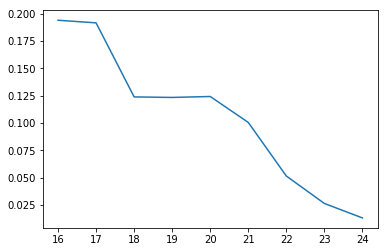

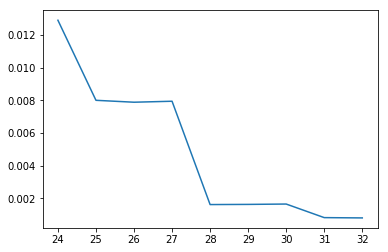

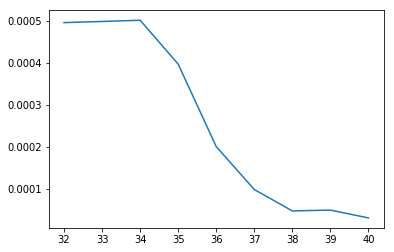

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sample = {8: 0.995584, 9: 0.971275, 10: 0.882199, 11: 0.882404, 12: 0.882586, 13: 0.81644, 14: 0.56212, 15: 0.352757, 16: 0.19386, 17: 0.191458, 18: 0.123785, 19: 0.123297, 20: 0.124158, 21: 0.10045, 22: 0.051487, 23: 0.026387, 24: 0.013172, 25: 0.01291, 26: 0.008001, 27: 0.007884, 28: 0.007944, 29: 0.001609, 30: 0.001619, 31: 0.001641, 32: 0.000808430, 33: 0.000790325, 34: 0.0004953, 35: 0.00049805, 36: 0.00050095, 37: 0.0003967, 38: 0.000200775 , 39: 9.8725e-05, 40: 4.79e-05, 41: 4.9825e-05, 42: 3.125e-05, 43: 3.075e-05 , 44 : 3.0425e-05, 45: 2.56e-05, 46: 1.2025e-05, 47:5.8e-06 , 48: 3.03983e-06} # 48 3.1e-06

# 16 : 0.1943437
# for diff 33 : 0.000790325
# for diff 34 : 0.0004953
# for diff 35 : 0.00049805
# for diff 36 : 0.00050095
# for diff 37 : 0.0003967
# for diff 38 : 0.000200775
# for diff 39 : 9.8725e-05
# for diff 40 : 4.79e-05 4.959e-05
# for diff 41 : 4.9825e-05
# for diff 42 : 3.125e-05
# for diff 43 : 3.075e-05
# for diff 44 : 3.0425e-05
# for diff 45 : 2.56e-05
# for diff 46 : 1.2025e-05
# hash_sample = {key: round(1/value,5) for (key,value) in sample.items()}
# hash_array= np.array([round(1/sample[key],5) for key in sample]).reshape(-1,8)
sample_array= [sample[key] for key in sample if key > 15]
sample_array = np.array(sample_array)#.extend([0,0,0,0,0,0,0]))
print(sample_array)
# hash_sample = 
diff = np.array([i for i in sample if i > 15])
prob = np.array([sample[i] for i in sample if i > 15])
plt.figure()
plt.plot(range(16,25),prob[0:9])
plt.figure()
plt.plot(range(24,33),prob[9:18])
plt.figure()
plt.plot(range(32,41),prob[18:27])
# plt.figure()
# plt.plot(range(40,49),prob[27:36])



In [9]:
n=56
k=6

def P(n,k):
    if n < 0:
        return 0
    elif n == 0:
        return 1
    elif n % 100 == 0:
        print(n)
    return P(n-1,k)*16 - P(n-k,k)

not_occurs = P(n,k)
total_combinations = 16 ** n
occurs_at_least_once = total_combinations - not_occurs
probabilty = occurs_at_least_once / total_combinations
hashes_to_find_a_block = int(total_combinations/occurs_at_least_once)
print(f'Not occurs = {not_occurs}')
print(f'Total_combitations = {total_combinations}')
print(f'Occurce once = {occurs_at_least_once}')
print(f'Probability {probabilty}, Hashes: {hashes_to_find_a_block}')

Not occurs = 26959864713409515830604903059825224792998242912355620692606754736384
Total_combitations = 26959946667150639794667015087019630673637144422540572481103610249216
Occurce once = 81953741123964062112027194405880638901510184951788496855512832
Probability 3.0398332064885217e-06, Hashes: 328965


In [40]:
n=56
k=2

def probability(n,k):
    p_dict = {}
    
    def _p(n,k):
        if n in p_dict:
            return p_dict[n]
        if n < 0:
            return 0
        elif n == 0:
            return 1
        p_dict[n] = _p(n-1,k)*16 - _p(n-k,k)
        return p_dict[n]
    return _p(n,k)

def P(n,k):
    if n < 0:
        return 0
    elif n == 0:
        return 1
    
    return P(n-1,k)*16 - P(n-k,k)

not_occurs = probability(n,k)
total_combinations = 16 ** n
occurs_at_least_once = total_combinations - not_occurs
probabilty = occurs_at_least_once / total_combinations
hashes_to_find_a_block = int(total_combinations/occurs_at_least_once)
print(f'Not occurs = {not_occurs}')
print(f'Total_combitations = {total_combinations}')
print(f'Occurce once = {occurs_at_least_once}')
print(f'Probability {probabilty}, Hashes: {hashes_to_find_a_block}')

Not occurs = 21720449010151817264188181461499755317563858326661283836077185657345
Total_combitations = 26959946667150639794667015087019630673637144422540572481103610249216
Occurce once = 5239497656998822530478833625519875356073286095879288645026424591871
Probability 0.19434376935852365, Hashes: 5
